In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import utils
import matplotlib.pyplot as plt

Import utilities and obtain dictionary of accuracies

In [2]:
path = r"../data_files/parquet_by_conductors/ecq_B_200_cond_0_123456_one_per_iso.parquet"
df = utils.load_data(path)

# choose your desired bounds (including the end points)
bounds_list = [(i**2-700, i**2+700) for i in range(60, 260, 10)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired step size for number of a_p's
step_size = 1
res_dict={}

# Example usage
for bounds in bounds_list:
    lower_bound, upper_bound = bounds
    bound = int(np.sqrt((upper_bound + lower_bound) / 2))
    res_df = utils.Generate_AccByNumAps_df(df, lower_bound, upper_bound, model, step_size = step_size)
    res_dict[bound] = utils.find_min_num_a_p_for_accuracy_thresholds(res_df)
    print(f"The square root of conductor {bound} needs the following number of ap values: {res_dict[bound]}")



Loaded the big dataset with 200 a_p's and 541081 curves..
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2900, 4300]..
There are 5369 curves within the conductor range [2900, 4300].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 60 needs the following number of ap values: {0.99: 191, 0.98: 65, 0.95: 36, 0.9: 23, 0.85: 17, 0.8: 12, 0.75: 8, 0.7: 7}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4200, 5600]..
There are 5565 curves within the conductor range [4200, 5600].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 70 needs the following number of ap values: {0.99: nan, 0.98: 73, 0.95: 38, 0.9: 27, 0.85: 18, 0.8: 13, 0.75: 9, 0.7: 7}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [5700, 7100]..
There are 6046 curves within the conductor range [5700, 7100].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 80 needs the following number of ap values: {0.99: nan, 0.98: 79, 0.95: 50, 0.9: 31, 0.85: 19, 0.8: 16, 0.75: 10, 0.7: 8}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [7400, 8800]..
There are 5696 curves within the conductor range [7400, 8800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 90 needs the following number of ap values: {0.99: nan, 0.98: 139, 0.95: 61, 0.9: 36, 0.85: 22, 0.8: 18, 0.75: 12, 0.7: 10}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [9300, 10700]..
There are 5887 curves within the conductor range [9300, 10700].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 100 needs the following number of ap values: {0.99: nan, 0.98: 171, 0.95: 80, 0.9: 46, 0.85: 25, 0.8: 20, 0.75: 12, 0.7: 10}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [11400, 12800]..
There are 5934 curves within the conductor range [11400, 12800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 110 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: 98, 0.9: 56, 0.85: 35, 0.8: 24, 0.75: 15, 0.7: 11}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [13700, 15100]..
There are 5988 curves within the conductor range [13700, 15100].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 120 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: 100, 0.9: 54, 0.85: 32, 0.8: 23, 0.75: 14, 0.7: 10}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [16200, 17600]..
There are 6158 curves within the conductor range [16200, 17600].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 130 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: 127, 0.9: 65, 0.85: 42, 0.8: 23, 0.75: 14, 0.7: 11}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [18900, 20300]..
There are 6080 curves within the conductor range [18900, 20300].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 140 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: 142, 0.9: 80, 0.85: 43, 0.8: 28, 0.75: 16, 0.7: 12}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [21800, 23200]..
There are 6024 curves within the conductor range [21800, 23200].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 150 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: 183, 0.9: 88, 0.85: 55, 0.8: 36, 0.75: 20, 0.7: 14}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [24900, 26300]..
There are 6171 curves within the conductor range [24900, 26300].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 160 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 104, 0.85: 58, 0.8: 36, 0.75: 20, 0.7: 15}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [28200, 29600]..
There are 6488 curves within the conductor range [28200, 29600].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 170 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: 196, 0.9: 105, 0.85: 58, 0.8: 37, 0.75: 21, 0.7: 16}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [31700, 33100]..
There are 6231 curves within the conductor range [31700, 33100].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 180 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 132, 0.85: 72, 0.8: 43, 0.75: 24, 0.7: 17}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [35400, 36800]..
There are 6264 curves within the conductor range [35400, 36800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 190 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 120, 0.85: 62, 0.8: 34, 0.75: 20, 0.7: 16}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [39300, 40700]..
There are 6354 curves within the conductor range [39300, 40700].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 200 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 149, 0.85: 82, 0.8: 43, 0.75: 26, 0.7: 16}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [43400, 44800]..
There are 6320 curves within the conductor range [43400, 44800].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 210 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 155, 0.85: 82, 0.8: 39, 0.75: 24, 0.7: 16}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [47700, 49100]..
There are 6126 curves within the conductor range [47700, 49100].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 220 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 199, 0.85: 96, 0.8: 59, 0.75: 26, 0.7: 18}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [52200, 53600]..
There are 6432 curves within the conductor range [52200, 53600].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 230 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 167, 0.85: 83, 0.8: 46, 0.75: 26, 0.7: 20}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [56900, 58300]..
There are 6226 curves within the conductor range [56900, 58300].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 240 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: 195, 0.85: 97, 0.8: 61, 0.75: 30, 0.7: 21}
**************************************************
Generating the accuracy by the number of a_p's dataframe for range [61800, 63200]..
There are 6335 curves within the conductor range [61800, 63200].


/Users/angelicababei/ml_rnt/notebooks/utils.py:110: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)


The square root of conductor 250 needs the following number of ap values: {0.99: nan, 0.98: nan, 0.95: nan, 0.9: nan, 0.85: 108, 0.8: 54, 0.75: 28, 0.7: 19}


Restructure the dictionary

In [3]:
# Initialize an empty dictionary to store the result
restructured_dict = {0.99: [], 0.98: [], 0.95: [], 0.9: [], 0.85: [], 0.8: [], 0.75: [], 0.7: []}


# Iterate through the original dictionary
for k, subdict in res_dict.items():
    # Iterate through each accuracy level in the restructured dictionary
    for accuracy in restructured_dict:
        # Check if the accuracy level exists in the subdictionary
        if accuracy in subdict:
            # Append the (k, v) pair to the corresponding list in the restructured dictionary
            restructured_dict[accuracy].append((k, subdict[accuracy]))



For each accuracy threshold in [0.99, 0.98, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7], plot points (square root of conductor, required number of ap's) in a different color, then fit a line for each separate threshold.

[(60, 191)]
[(60, 65), (70, 73), (80, 79), (90, 139), (100, 171)]
[(60, 36), (70, 38), (80, 50), (90, 61), (100, 80), (110, 98), (120, 100), (130, 127), (140, 142), (150, 183), (170, 196)]
[(60, 23), (70, 27), (80, 31), (90, 36), (100, 46), (110, 56), (120, 54), (130, 65), (140, 80), (150, 88), (160, 104), (170, 105), (180, 132), (190, 120), (200, 149), (210, 155), (220, 199), (230, 167), (240, 195)]
[(60, 17), (70, 18), (80, 19), (90, 22), (100, 25), (110, 35), (120, 32), (130, 42), (140, 43), (150, 55), (160, 58), (170, 58), (180, 72), (190, 62), (200, 82), (210, 82), (220, 96), (230, 83), (240, 97), (250, 108)]
[(60, 12), (70, 13), (80, 16), (90, 18), (100, 20), (110, 24), (120, 23), (130, 23), (140, 28), (150, 36), (160, 36), (170, 37), (180, 43), (190, 34), (200, 43), (210, 39), (220, 59), (230, 46), (240, 61), (250, 54)]
[(60, 8), (70, 9), (80, 10), (90, 12), (100, 12), (110, 15), (120, 14), (130, 14), (140, 16), (150, 20), (160, 20), (170, 21), (180, 24), (190, 20), (200, 26), (

/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_32723/575038349.py:16: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x_np, y_np, 1)


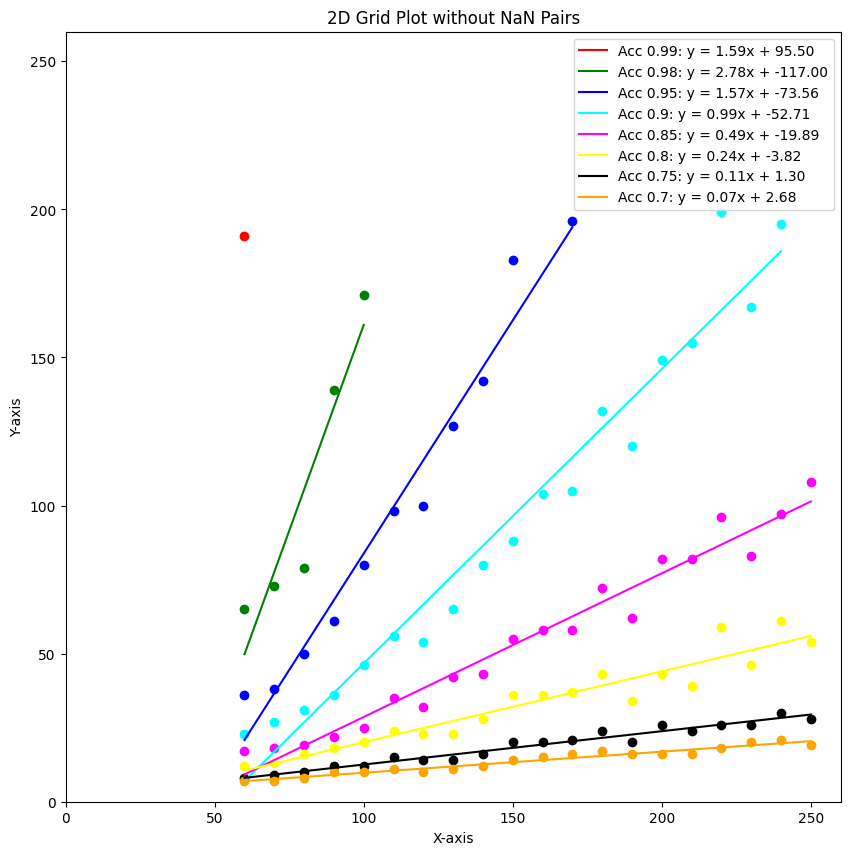

In [4]:
# Define colors for each subdictionary
colors = {0.99: 'red', 0.98: 'green', 0.95: 'blue', 0.9: 'cyan', 0.85: 'magenta', 0.8: 'yellow', 0.75: 'black', 0.7: 'orange'}

plt.figure(figsize=(10, 10))

for accuracy, pairs in restructured_dict.items():
    # Remove pairs with 'nan' values
    cleaned_pairs = [(x, y) for x, y in pairs if type(y) == int]
    print(cleaned_pairs)
    if cleaned_pairs:
        x_vals, y_vals = zip(*cleaned_pairs)
        # Convert to numpy arrays for linear regression
        x_np = np.array(x_vals, dtype=np.float64)
        y_np = np.array(y_vals, dtype=np.float64)
        # Calculate the coefficients of the line of best fit
        m, b = np.polyfit(x_np, y_np, 1)
        # Plot the cleaned scatter plot
        plt.scatter(x_vals, y_vals, color=colors[accuracy])
        # Plot the line of best fit
        plt.plot(x_np, m*x_np + b, color=colors[accuracy], label=f'Acc {accuracy}: y = {m:.2f}x + {b:.2f}')

# Set the limits of the x and y axes
plt.xlim(0, 260)
plt.ylim(0, 260)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Grid Plot without NaN Pairs')
plt.legend()

# Show the plot
plt.show()